In [19]:
import csv
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

In [2]:
raw_data = pd.read_json("train.json")
test_df = pd.read_json("test.json")

In [10]:
## Creating variables based on the listing features
features_list = list(raw_data['features'])

## feature mapping
unique_features_mapping = {}
id_val = 1

for item in features_list:
    if len(item) > 0:
        for f in item:
            if f not in list(unique_features_mapping.keys()):
                unique_features_mapping[f] = id_val
                id_val = id_val + 1

In [11]:
## feature mapping
features_mapping = {}
id_val = 1

for item in features_list:
    if len(item) > 0:
        for f in item:
            if f not in list(features_mapping.keys()):
                features_mapping_1[f] = id_val
                id_val = id_val + 1

## Writing to csv and used it in open refine
'''with open('mapping_original.csv', 'w') as f:
    for items in features_mapping_1.items():
        line_item = str(items[0]) + ',' + str(items[1]) + '\n'
        f.write(line_item) '''

## read the modifed open refine file
updated_feature_mapping = {}
id_val_new = 1
with open('mapping.csv') as f:
    for line in f:
        items = line.split(",")
        item_id = int(items[1][:-1])
        if item_id not in list(updated_feature_mapping.keys()):
            updated_feature_mapping[item_id] = id_val_new
            id_val_new = id_val_new + 1



In [47]:
## Final Mapping dict
final_mapping = {}

for key in features_mapping.keys():
    final_mapping[key] = updated_feature_mapping[features_mapping[key]]

In [51]:
raw_data['num_photos'] = raw_data['photos'].apply(len)
raw_data['num_features'] = raw_data['features'].apply(len)
raw_data['num_description_words'] = raw_data['description'].apply(lambda x: len(x.split(' ')))
raw_data['num_description_len'] = raw_data['description'].apply(len)

In [52]:
raw_data['created'] = pd.to_datetime(raw_data['created'])
raw_data['date'] = raw_data['created'].dt.date
raw_data["year"] = raw_data["created"].dt.year
raw_data['month'] = raw_data['created'].dt.month
raw_data['day'] = raw_data['created'].dt.day
raw_data['hour'] = raw_data['created'].dt.hour
raw_data['weekday'] = raw_data['created'].dt.weekday
raw_data['week'] = raw_data['created'].dt.week
raw_data['quarter'] = raw_data['created'].dt.quarter
raw_data['weekend'] = ((raw_data['weekday'] == 5) & (raw_data['weekday'] == 6))
raw_data['weekday'] = ((raw_data['weekday'] != 5) & (raw_data['weekday'] != 6))

In [53]:
raw_data.columns

Index(['bathrooms', 'bedrooms', 'building_id', 'created', 'description',
       'display_address', 'features', 'interest_level', 'latitude',
       'listing_id', 'longitude', 'manager_id', 'photos', 'price',
       'street_address', 'num_photos', 'num_features', 'num_description_words',
       'num_description_len', 'date', 'year', 'month', 'day', 'hour',
       'weekday', 'week', 'quarter', 'weekend'],
      dtype='object')

In [69]:
featured_df = raw_df.copy()

Index(['bathrooms', 'bedrooms', 'building_id', 'created', 'description',
       'display_address', 'features', 'interest_level', 'latitude',
       'listing_id', 'longitude', 'manager_id', 'photos', 'price',
       'street_address', 'num_photos', 'num_features', 'num_description_words',
       'num_description_len', 'date', 'year', 'month', 'day', 'hour',
       'weekday', 'week', 'quarter', 'weekend'],
      dtype='object')

In [70]:
featured_df = featured_df.drop(['building_id','display_address', 'description','features', 'manager_id', 'photos', 'street_address' ], axis = 1)
featured_df.to_csv("processed_data.csv", index = False)

In [73]:
test_df = pd.read_json("test.json")

test_df['num_photos'] = test_df['photos'].apply(len)
test_df['num_features'] = test_df['features'].apply(len)
test_df['num_description_words'] = test_df['description'].apply(lambda x: len(x.split(' ')))
test_df['num_description_len'] = test_df['description'].apply(len)
test_df['created'] = pd.to_datetime(test_df['created'])
test_df['date'] = test_df['created'].dt.date
test_df["year"] = test_df["created"].dt.year
test_df['month'] = test_df['created'].dt.month
test_df['day'] = test_df['created'].dt.day
test_df['hour'] = test_df['created'].dt.hour
test_df['weekday'] = test_df['created'].dt.weekday
test_df['week'] = test_df['created'].dt.week
test_df['quarter'] = test_df['created'].dt.quarter
test_df['weekend'] = ((test_df['weekday'] == 5) & (test_df['weekday'] == 6))
test_df['weekday'] = ((test_df['weekday'] != 5) & (test_df['weekday'] != 6))

In [74]:
processed_test_df = test_df.copy()
processed_test_df = processed_test_df.drop(['building_id','display_address', 'description','features', 'manager_id', 'photos', 'street_address' ], axis = 1)
processed_test_df.to_csv("processed_test.csv", index = False)

In [81]:
featured_df = featured_df.drop(['created', 'date','quarter' , 'year'], axis = 1)
processed_test_df = processed_test_df.drop(['created', 'date','quarter' , 'year'], axis = 1)

In [86]:
featured_df[['weekday', 'weekend']] = (featured_df[['weekday', 'weekend']] == True).astype(int)
processed_test_df[['weekday', 'weekend']] = (processed_test_df[['weekday', 'weekend']] == True).astype(int)

In [90]:
## feature df
featured_df['y'] = 0.0
featured_df.loc[featured_df.interest_level=='medium', 'y'] = 1.0
featured_df.loc[featured_df.interest_level=='high', 'y'] = 2.0

## y
y_train = featured_df['y']
listing_id = featured_df['listing_id']
listing_id_test = processed_test_df['listing_id']
list_ids = listing_id_test.values
processed_test_df = processed_test_df.drop('listing_id', axis = 1)
featured_df = featured_df.drop('listing_id', axis = 1)
featured_df = featured_df.drop('y', axis = 1)
featured_df = featured_df.drop(['weekday','weekend'], axis = 1)
processed_test_df = processed_test_df.drop(['weekday','weekend'], axis = 1)

In [136]:
x_train = featured_df.values
y = y_train.values
x_test = processed_test_df.values

In [137]:
## normalizing
for i in range(x_train.shape[1]):
    x_test[:, i] = (x_test[:, i] - np.mean(x_train[:, i]))/np.std(x_train[:, i])
    x_train[:, i] = (x_train[:, i] - np.mean(x_train[:, i]))/np.std(x_train[:, i])

In [129]:
from sklearn.preprocessing import StandardScaler, Imputer, LabelBinarizer
from sklearn.metrics import log_loss
from sklearn.neural_network import MLPClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
import time

In [166]:
clf_nn = MLPClassifier(solver='lbfgs', random_state=1)
params = {
    'alpha': [1e-6], # 1e-5, 1e-4...
    'activation': ['tanh'], # 'relu', 'sigmoid'....
    'hidden_layer_sizes': [(10,5,10)]#, (30, 30, 5), (20, 20, 20), (30, 30, 5)]
}
gs_nn = GridSearchCV(clf_nn, param_grid=params, scoring='neg_log_loss', n_jobs=2, cv=2, verbose=2, refit=True) # cv=5
start = time.time()
gs_nn.fit(x_train, y)
print('- Time: %.2f minutes' % ((time.time() - start)/60))
print('- Best score: %.4f' % gs_nn.best_score_)
print('- Best params: %s' % gs_nn.best_params_)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    9.4s finished


- Time: 0.43 minutes
- Best score: -0.6590
- Best params: {'alpha': 1e-06, 'activation': 'tanh', 'hidden_layer_sizes': (10, 5, 10)}


In [167]:
def output_results(clf, x_test, listing, fname):
    preds = clf.predict_proba(x_test)
    preds = pd.DataFrame(preds)
    cols = ['low', 'medium', 'high']
    preds.columns = cols
    preds['listing_id'] = listing
    preds.to_csv(fname, index=None)
    print(preds[cols].mean().values)

output_results(gs_nn, x_test, list_ids, 'basic_nn_659.csv')

[ 0.69233104  0.23027923  0.07738974]


In [144]:
##(10,5,10) relu 0.665
##(10,5,10) tanh 0.665

In [174]:
import gpxpy as gpx
import gpxpy.gpx

gpx = gpxpy.gpx.GPX()
location_num = 0
for index, row in raw_data.iterrows():
    #print (row['latitude'], row['longitude'])
    if location_num <= 4000:
        if row['interest_level'] == 'medium': #opting for all nominals results in poor performance of Google Earth
            gps_waypoint = gpxpy.gpx.GPXWaypoint(row['latitude'],row['longitude'],elevation=10)
            gpx.waypoints.append(gps_waypoint)
            location_num = location_num + 1
    else:
        break
        
filename = "GoogleEarth_medium.gpx"
FILE = open(filename,"w")
FILE.writelines(gpx.to_xml())
FILE.close()

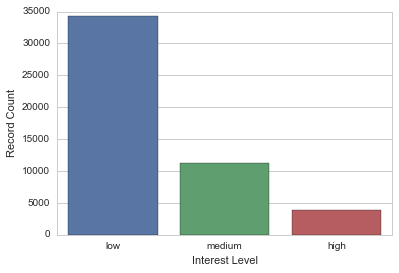

In [177]:
sns.countplot(raw_data.interest_level, order=['low', 'medium', 'high'])
plt.xlabel('Interest Level')
plt.ylabel('Record Count')
plt.savefig('Interest_Level.png')

TypeError: slice indices must be integers or None or have an __index__ method

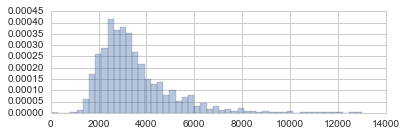

In [182]:
sns.distplot(train_data.price[train_data.price<=train_data.price.quantile(0.99)], ax=plt.subplot(211));
plt.xlabel('Price');
plt.ylabel('Density');
### Average Price per Interest Level
sns.barplot(x="interest_level", y="price", order=['low', 'medium', 'high'],
            data=train_data, ax=plt.subplot(223));
plt.xlabel('Interest Level');
plt.ylabel('Price');
### Violinplot of price for every Interest Level
sns.violinplot(x="interest_level", y="price", order=['low', 'medium', 'high'],
               data=train_data[train_data.price<=train_data.price.quantile(0.99)],
               ax=plt.subplot(224));
plt.xlabel('Interest Level');
plt.ylabel('Price');

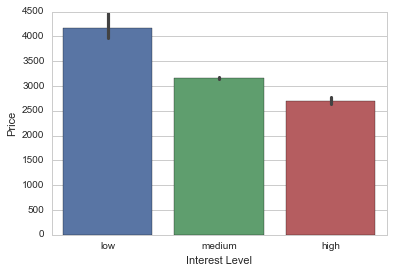

In [185]:
sns.barplot(x="interest_level", y="price", order=['low', 'medium', 'high'],
            data=train_data);
plt.xlabel('Interest Level');
plt.ylabel('Price');

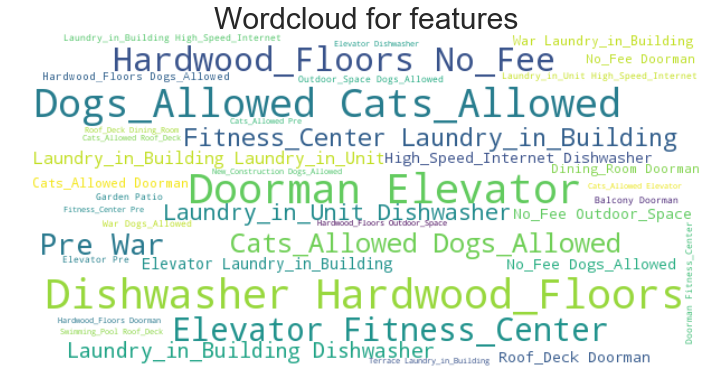

In [190]:
from wordcloud import WordCloud

text = ''
text_da = ''
text_desc = ''
for ind, row in train_data.iterrows():
    for feature in row['features']:
        text = " ".join([text, "_".join(feature.strip().split(" "))])
    #text_desc = " ".join([text_desc, row['description']])
text = text.strip()
text_da = text_da.strip()
text_desc = text_desc.strip()

plt.figure(figsize=(12,6))
wordcloud = WordCloud(background_color='white', width=600, height=300, max_font_size=50, max_words=40).generate(text)
wordcloud.recolor(random_state=0)
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("feature_wordcloud.png")
plt.show()

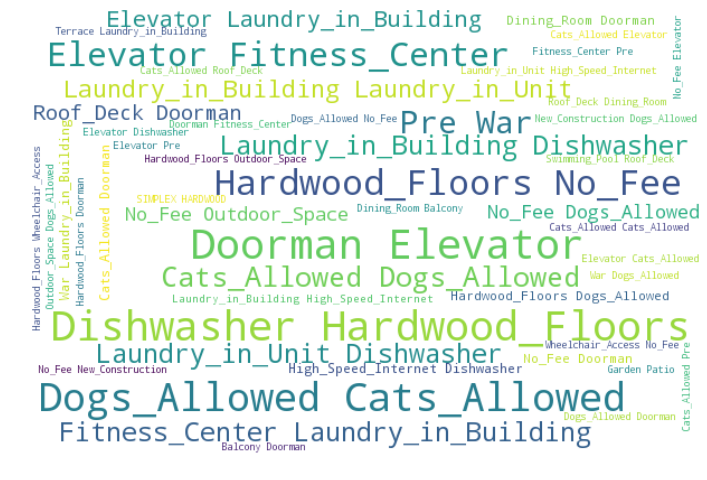

In [193]:
plt.figure(figsize=(12,8))
wordcloud = WordCloud(background_color='white', width=600, height=400, max_font_size=50, max_words=50).generate(text)
wordcloud.recolor(random_state=0)
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("feature_wordcloud.png")
plt.show()

49352